NAME = YASH U DUBAL 


PROJEC NAME = Statistics For Data Science

THIS PROJECT CONSITS OF UNDERSTANDING AND VISUVALIZATION OF SOME OF THE KEY CONCEPTS OF STATISTIC IN DATA SCIENCE such as :

1) Measure of central tendency

2) Measure of Spread

3) Correlations and covariance 

4) Distributions

5) Understand Central Limit Theorem     and     Confidence Interval   

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
df = pd.DataFrame({'movie ': ['a','b','c','a' , 'b' , 'c' , 'a' , 'b' , 'c'],
                   'rating': [9,7,6,9,5,7,8,9,5]})

In [5]:
df.mean()

<ipython-input-5-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


rating    7.222222
dtype: float64

In [6]:
df.mode()

,movie,rating
0,a,9.0
1,b,NaN
2,c,NaN


In [7]:
df.median()

<ipython-input-7-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


rating    7.0
dtype: float64

**VISUVALIZATION OF CENTRAL TENDENCY**

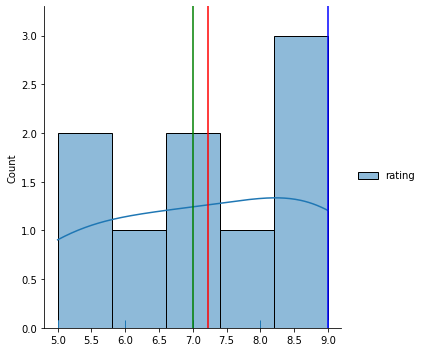

In [8]:
sns.displot(df, kde=True, rug=True)
plt.axvline(np.mean(df.rating), color='r', linestyle='-')
plt.axvline(np.median(df.rating), color='g', linestyle='-')
plt.axvline(df.rating.mode().values[0], color='b', linestyle='-')

**VISUVALIZATION OF CENTRAL TENDENCY IN ANOTHER WAY**

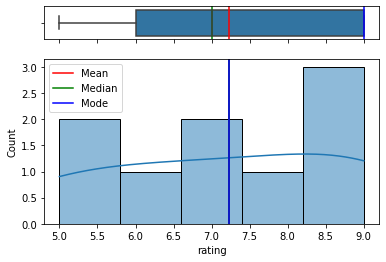

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex= True,
                                     gridspec_kw={'height_ratios':(0.2,1)})

mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

sns.boxplot(data=df, x = 'rating', ax=ax_box)
ax_box.axvline(mean,color='r',linestyle='-')
ax_box.axvline(median,color='g',linestyle='-')
ax_box.axvline(mode,color='b',linestyle='-')

sns.histplot(data=df, x ='rating', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r',linestyle='-',label='Mean')
ax_hist.axvline(mean, color='g',linestyle='-',label='Median')
ax_hist.axvline(mean, color='b',linestyle='-',label='Mode')

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()


In [10]:
df.rating.var()

2.6944444444444446

In [11]:
df.rating.std()

1.6414763002993509

In [17]:
df.std()


<ipython-input-17-ce97bb7eaef8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


rating    1.641476
dtype: float64

In [27]:
df1 = pd.DataFrame({'pop_sample':range(20)})

In [32]:
df1.sample(5).mean()

pop_sample    13.6
dtype: float64

In [30]:
df1.sample(10).mean()

pop_sample    11.3
dtype: float64

In [31]:
df1.mean()

pop_sample    9.5
dtype: float64

In [34]:
from scipy import stats 
stats.sem(df1)



array([1.32287566])

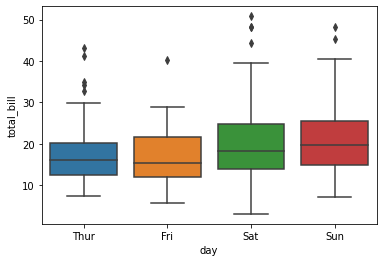

In [37]:
df2=sns.load_dataset('tips')

ax=sns.boxplot(x='day', y='total_bill', data=df2)

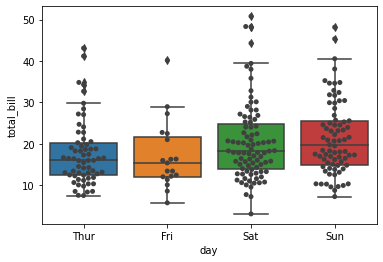

In [38]:
ax = sns.boxplot(x='day',y='total_bill', data=df2)
ax = sns.swarmplot(x='day',y='total_bill', data=df2 , color='0.25')

In [40]:
print(df2['total_bill'].quantile(0.75) - df2['total_bill'].quantile(0.25))

10.779999999999998


CALCULATING IQR 

In [39]:
print(df2['total_bill'].quantile([0.05,0.25,0.5,0.75]))

0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64


In [41]:
df3 = sns.load_dataset('iris')

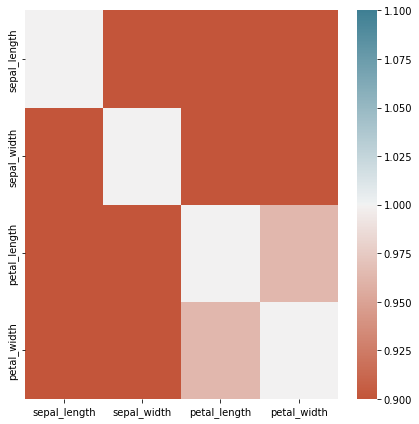

In [42]:
fig, ax=plt.subplots(figsize=(6,6))
ax = sns.heatmap(df3.corr(), vmin= 1, vmax=1 ,
                 cmap=sns.diverging_palette(20,220, as_cmap=True), ax=ax)
plt.tight_layout()
plt.show()

In [43]:
a = [11,12,22,11]
b = [7,8,9,10]
c=[10,11,22,23]
arr = np.array([a,b,c])

In [44]:
cov_matrix = np.cov(arr, bias=True)

In [45]:
cov_matrix

array([[21.5 ,  1.25, 13.75],
       [ 1.25,  1.25,  6.25],
       [13.75,  6.25, 36.25]])

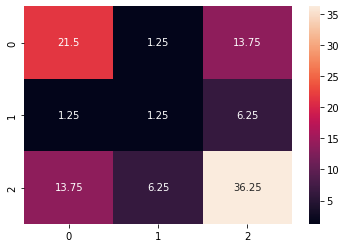

In [46]:
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

DISTRUBUTIONS OF OUR DATA

In [47]:
df.skew()

<ipython-input-47-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


rating   -0.23507
dtype: float64

Negative skew refers to a longer or fatter tail on the left side of the distribution

In statistics, kurtosis is used to describe the shape of a probability distribution.

Specifically, it tells us the degree to which data values cluster in the tails or the peak of a distribution.

The kurtosis for a distribution can be negative, equal to zero, or positive.

In [48]:
df.kurtosis()

<ipython-input-48-c7edf97eb14c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


rating   -1.570351
dtype: float64

Negative Kurtosis
If a distribution has negative kurtosis, it is said to be platykurtic, which means that it has a flatter peak and thinner tails compared to a normal distribution

<function matplotlib.pyplot.show(close=None, block=None)>

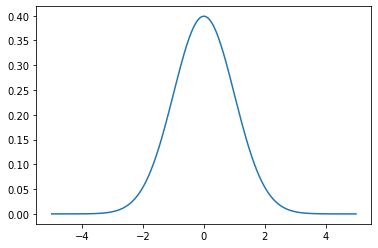

In [49]:
norm1 = np.arange(-5, 5 , 0.001)
mean = 0.0
std = 1.0
pdf = stats.norm.pdf(norm1, mean , std )
plt.plot(norm1,pdf)
plt.show

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

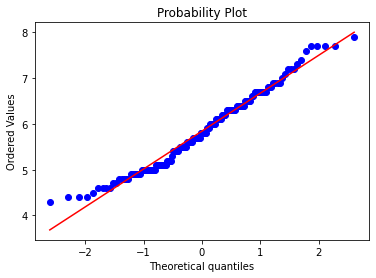

In [50]:
import pylab 
stats.probplot(df3.sepal_length, plot=pylab)

for a probability plot, and optionally show the plot. Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). probplot optionally calculates a best-fit line for

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

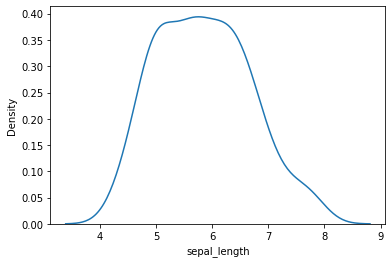

In [51]:
sns.kdeplot(df3.sepal_length)

FROM THE ABOVE VISUALIZATION WE CAN SEE BOTH OF THE DATA IS SKEWED AT THE TAILS

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment, either Success or Failure

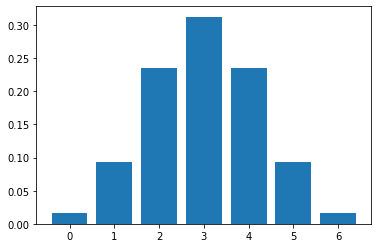

In [54]:
from scipy.stats import binom
n = 6
p = 0.5 
r_value = list(range(n+1))
dist = [binom.pmf(r,n,p) for r in r_value]
plt.bar(r_value, dist)
plt.show()

A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space.

The Poisson distribution has only one parameter, λ (lambda), which is the mean number of events. The graph below shows examples of Poisson distributions with different values of λ.

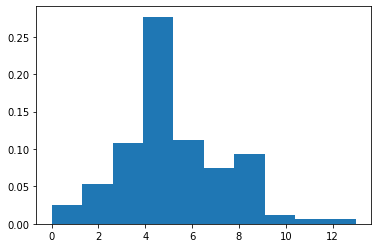

In [55]:
s = np.random.poisson(5,1000)
count, bins, ignored = plt.hist(s, 10, density=True)
plt.show()

****Central Limit Theorem
The Central Limit Theorem(CLT) states that for any data, provided a high number of samples have been taken. The following properties hold:

Sampling Distribution Mean(μₓ¯) = Population Mean(μ)
Sampling distribution’s standard deviation (Standard error) = σ/√n ≈S/√n
For n > 30, the sampling distribution becomes a normal distribution.****

In [60]:
import statsmodels.stats.api as sms 
sms.DescrStatsW(df3.sepal_length).tconfint_mean()


(5.709732481507366, 5.976934185159301)

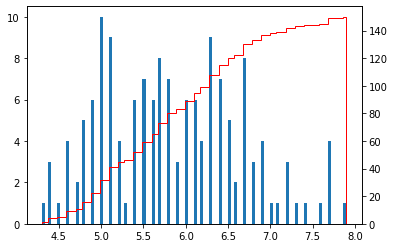

In [61]:
fig , ax = plt.subplots()
ax2 = ax.twinx()
n , bins, patches = ax.hist(df3.sepal_length, bins = 100)
n , bins, patches = ax2.hist(df3.sepal_length, cumulative = 1 ,histtype='step',
bins=100,color = 'r')

(array([  9.,  32.,  46.,  73.,  89., 115., 133., 139., 144., 150.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 [<matplotlib.patches.Polygon at 0x7f8459e2cbe0>])

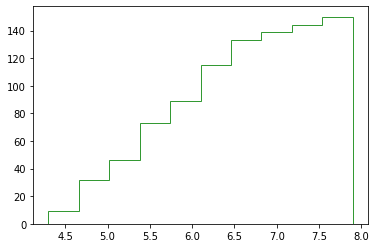

In [62]:
plt.hist(df3.sepal_length,cumulative=True, label='CDF', histtype='step',alpha = 0.8,color='g')

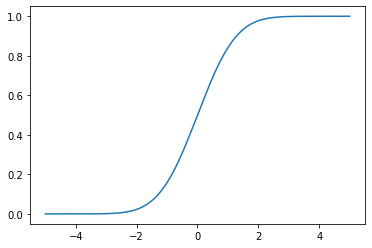

In [63]:
cdf = stats.norm.cdf(norm1)
plt.plot(norm1, cdf )
plt.show()

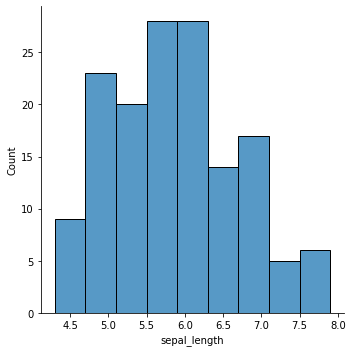

In [64]:
ax = sns.displot(df3.sepal_length)